#World Justice Project-Rule of Law Index
El Índice de Estado de Derecho (Rule of Law Index) del World Justice Project (WJP) es uno de los estudios más importantes a nivel global para medir cómo se aplica el estado de derecho en diferentes países.
##¿Qué es el índice?
Es un ranking anual que evalúa el nivel de cumplimiento del estado de derecho en más de 140 países.
Se basa en encuestas a ciudadanos y expertos legales para medir cómo funcionan las leyes en la práctica, no solo en teoría.

##🎯Objetivo:
Ayudar a gobiernos, organizaciones y ciudadanos a entender las fortalezas y debilidades en el sistema legal y la justicia en sus países.

Por: Israel Sánchez Graciano
Información recuperada de: https://worldjusticeproject.org/

In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesado y modelado

In [ ]:
from google.colab import drive


Mounted at /content/drive


In [ ]:
df.describe()

,Factor 1: Limited Government Powers,Factor 2: Absence of Corruption,Factor 3: Order and Security,Factor 4: Fundamental Rights,Factor 5: Open Government,Factor 6: Regulatory Enforcement,Factor 7: Civil Justice,Factor 8: Criminal Justice
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,0.557644,0.521961,0.528121,0.580418,0.720798,0.541238,0.550283,0.483475
std,0.162999,0.190842,0.152631,0.159504,0.128262,0.149626,0.135958,0.161841
min,0.170000,0.160000,0.220000,0.180000,0.280000,0.190000,0.200000,0.110000
25%,0.450000,0.380000,0.420000,0.460000,0.640000,0.440000,0.450000,0.360000
50%,0.540000,0.470000,0.500000,0.570000,0.720000,0.500000,0.530000,0.450000
75%,0.660000,0.670000,0.620000,0.700000,0.810000,0.620000,0.630000,0.590000
max,0.950000,0.960000,0.930000,0.930000,0.950000,0.900000,0.890000,0.870000


In [ ]:
df.columns

Index(['Factor 1: Limited Government Powers',
       'Factor 2: Absence of Corruption', 'Factor 3: Order and Security',
       'Factor 4: Fundamental Rights', 'Factor 5: Open Government ',
       'Factor 6: Regulatory Enforcement', 'Factor 7: Civil Justice',
       'Factor 8: Criminal Justice'],
      dtype='object')

<Axes: >

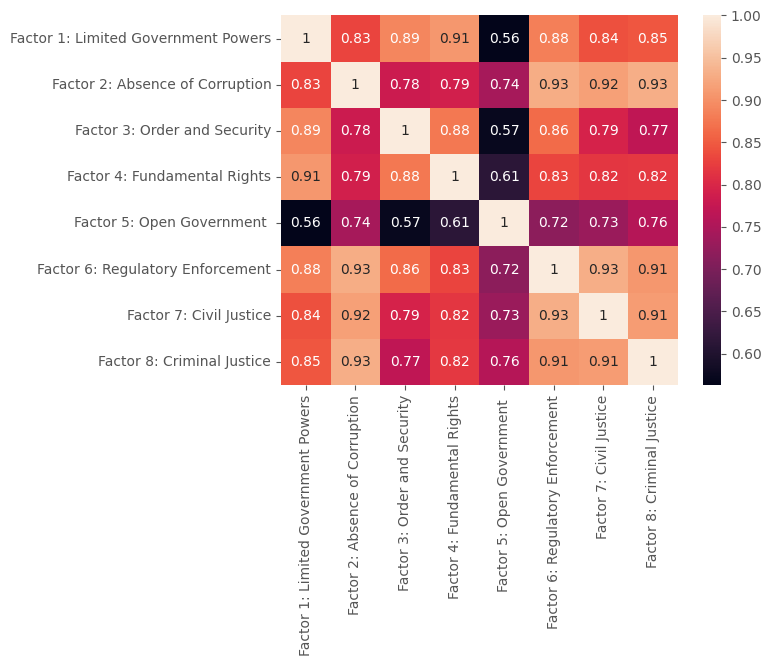

In [ ]:
#Creación del modelo


modelo = LinearRegression()
modelo.fit(X=X_train, y=y_train) # X_train definied

LinearRegression()

In [ ]:

y_train_single = y_train.loc[:, "Factor 6: Regulatory Enforcement"]

y_train_single = y_train["Factor 6: Regulatory Enforcement"]

# Remove the redundant 'exog=X_train'
modeloo = sm.Logit(y_train_single, X_train)

In [ ]:

# Access the "Factor 6: Regulatory Enforcement" column using .loc[]
# Convert y_train to a DataFrame if it's an array:
y_train = pd.DataFrame(y_train, columns=['Factor 6: Regulatory Enforcement', 'Factor 2: Absence of Corruption', 'Factor 3: Order and Security'])
y_train_single = y_train.loc[:, "Factor 6: Regulatory Enforcement"]

# Or, if y_train is a DataFrame and you want a Series:
y_train_single = y_train["Factor 6: Regulatory Enforcement"]

# Remove the redundant 'exog=X_train'
modeloo = sm.Logit(y_train_single, X_train)

In [ ]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.622841
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     Factor 7: Civil Justice   No. Observations:                 1072
Model:                               Logit   Df Residuals:                     1070
Method:                                MLE   Df Model:                            1
Date:                     Mon, 17 Mar 2025   Pseudo R-squ.:                 0.01503
Time:                             01:24:29   Log-Likelihood:                -667.69
converged:                            True   LL-Null:                       -677.88
Covariance Type:                 nonrobust   LLR p-value:                 6.337e-06
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                   

#Conclusiones

1)El modelo es altamente significativo (p < 0.05), lo que indica que Factor 7 (Civil Justice) es un predictor importante de Factor 6 (Regulatory Enforcement).

2)Existe una fuerte relación positiva → Un mejor sistema de justicia civil está fuertemente relacionado con un mejor cumplimiento de regulaciones.

3)El odds ratio es alto (88.91), lo que sugiere que un país con una justicia civil fuerte tiene muchas más probabilidades de tener una mejor aplicación de regulaciones.

##Regresión Logística

In [ ]:
df['Factor 7: Civil Justice'].value_counts().sort_index()

,count
Factor 7: Civil Justice,
0.20,1
0.21,1
0.23,1
0.25,4
0.26,3
...,...
0.85,7
0.86,11
0.87,7


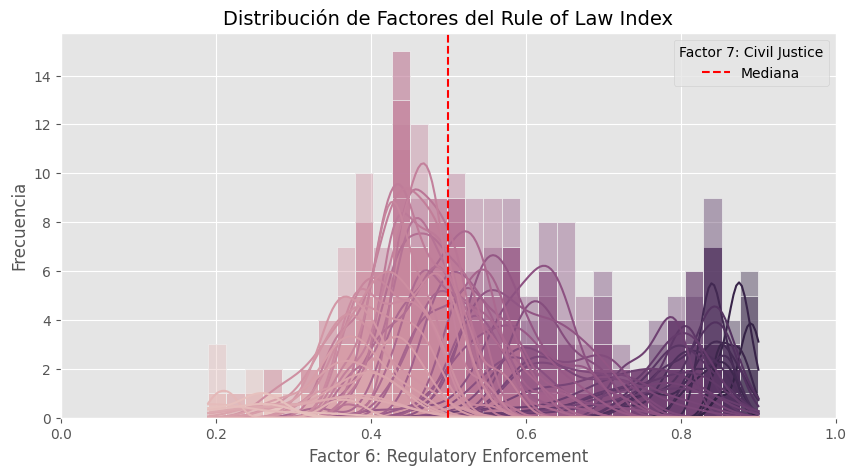

In [ ]:
#Análisis exploratorio




In [ ]:
# División de datos en train y test
X = df[["Factor 6: Regulatory Enforcement"]]
y = df["Factor 7: Civil Justice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci


,2.5%,97.5%
const,-2.287227,-1.304398
Factor 6: Regulatory Enforcement,2.822179,4.625926


In [ ]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
predicciones[:4]

,0
872,0.814777
67,0.497933
633,0.497933
1007,0.797321


In [ ]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
# vector con nuevos valores
grid_X = np.linspace(
            start = min(df['Factor 7: Civil Justice']),
            stop  = max(df['Factor 7: Civil Justice']),
            num   = 200
         ).reshape(-1,1)

grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)


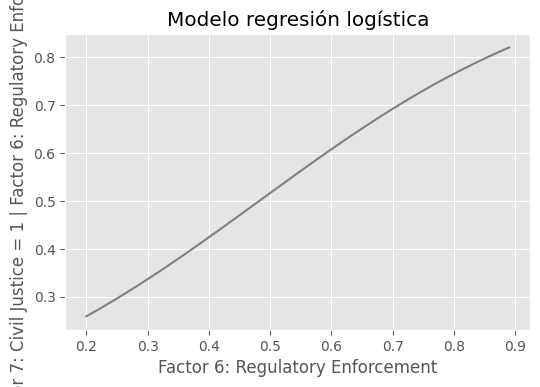

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))


ax.scatter(
    X_train.loc[(y_train == 1).values, X_train.columns[1]],
    y_train[(y_train == 1).values].values
)
ax.scatter(
    X_train.loc[(y_train == 0).values, X_train.columns[1]],
    y_train[(y_train == 0).values].values
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(Factor 7: Civil Justice = 1 | Factor 6: Regulatory Enforcement)")
ax.set_xlabel("Factor 6: Regulatory Enforcement");

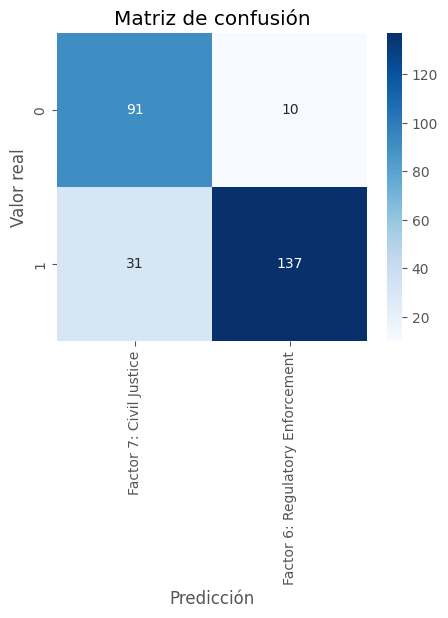

In [ ]:
#Matriz
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Factor 7: Civil Justice" , "Factor 6: Regulatory Enforcement"]) # Changed 'headmap' to 'heatmap'
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()

##Linear Discriminant Analysis

In [ ]:
# Cargar dataset de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertir a DF
df = pd.DataFrame(X, columns=iris.feature_names)
df["Factor 7: Civil Justice'"] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Factor 7: Civil Justice'  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



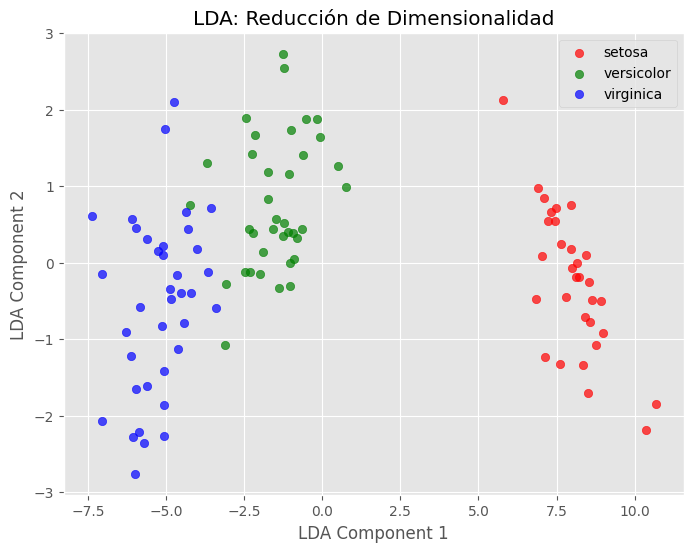

In [ ]:

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA: Reducción de Dimensionalidad")
plt.legend()
plt.show()


##Quadratic discriminit analysis